#Linear Regression

Tutorial of using TensorFlow to build linear regression model

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

##Generate toy dataset

In [2]:
# Generate train dataset
X = tf.constant(range(10), dtype=tf.float32)
Y = 2 * X + 1

print("X:{}".format(X))
print("Y:{}".format(Y))

X:[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Y:[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]


In [6]:
def create_dataset(X, Y, epochs, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.repeat(epochs).batch(batch_size, drop_remainder=True)
    return dataset

In [7]:
BATCH_SIZE = 3
EPOCHS = 2

dataset = create_dataset(X, Y, EPOCHS, BATCH_SIZE)

for i, (x, y) in enumerate(dataset):
# You can convert a native TF tensor to a NumPy array using .numpy() method
# Let's output the value of `x` and `y`
    print("x:", x.numpy(), "y:", y.numpy())
    assert len(x) == BATCH_SIZE
    assert len(y) == BATCH_SIZE

x: [0. 1. 2.] y: [1. 3. 5.]
x: [3. 4. 5.] y: [ 7.  9. 11.]
x: [6. 7. 8.] y: [13. 15. 17.]
x: [9. 0. 1.] y: [19.  1.  3.]
x: [2. 3. 4.] y: [5. 7. 9.]
x: [5. 6. 7.] y: [11. 13. 15.]


##Loss function & Gradient

In [8]:
# Compute loss
def loss_mse(X, Y, w, b):
    y_pred = X * w + b
    error = (y_pred - Y) ** 2
    return tf.reduce_mean(error)

# Compure gradient
def compute_gradients(X, Y, w, b):
    with tf.GradientTape() as tape:
        loss = loss_mse(X, Y, w, b)
    return tape.gradient(loss, [w, b])

##Training loop

In [12]:
# Constant values
EPOCHS = 250
BATCH_SIZE = 2
LEARNING_RATE = 0.01

MSG = "STEP {step} - loss: {loss}, w: {w}, b: {b}\n"

# Initialize a list to store losses
loss_history = []

# Initialize the weight and the bias
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# Initialize the dataset
dataset = create_dataset(X, Y, EPOCHS, BATCH_SIZE)

# Training loop
for step, (X_batch, Y_batch) in enumerate(dataset):
    # Compute the gradient
    dw, db = compute_gradients(X_batch, Y_batch, w, b)

    # Update parameters by using gradient descent
    w.assign_sub(dw * LEARNING_RATE)
    b.assign_sub(db * LEARNING_RATE)

    if step % 100 == 0:
        loss = loss_mse(X_batch, Y_batch, w, b)
        print(MSG.format(step=step, loss=loss, w=w.numpy(), b=b.numpy()))
        loss_history.append(loss)

STEP 0 - loss: 4.753250598907471, w: 0.029999999329447746, b: 0.03999999910593033

STEP 100 - loss: 0.07761245965957642, w: 2.032413959503174, b: 0.7056747674942017

STEP 200 - loss: 0.02268073707818985, w: 2.0175225734710693, b: 0.840892493724823

STEP 300 - loss: 0.006628049537539482, w: 2.009472370147705, b: 0.9139888882637024

STEP 400 - loss: 0.0019369106739759445, w: 2.0051207542419434, b: 0.9535037875175476

STEP 500 - loss: 0.0005660235183313489, w: 2.002768039703369, b: 0.9748650789260864

STEP 600 - loss: 0.00016540249634999782, w: 2.0014963150024414, b: 0.9864127039909363

STEP 700 - loss: 4.833878847421147e-05, w: 2.0008087158203125, b: 0.9926548004150391

STEP 800 - loss: 1.4127646863926202e-05, w: 2.000437021255493, b: 0.9960291981697083

STEP 900 - loss: 4.126977273699595e-06, w: 2.0002365112304688, b: 0.9978536367416382

STEP 1000 - loss: 1.206297383760102e-06, w: 2.0001277923583984, b: 0.9988396763801575

STEP 1100 - loss: 3.5225340866418264e-07, w: 2.0000691413879395,

##Model evaluations

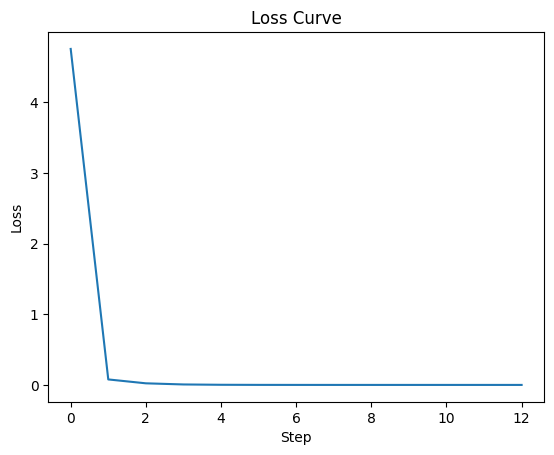

In [13]:
# Plotting the loss curve
plt.plot(loss_history)
plt.title('Loss Curve')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()